In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/adult 3.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.shape

(48842, 15)

In [4]:
#to find null values
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [5]:
#checking the values of each column
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [6]:
print(data['education'].value_counts())

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [7]:
print(data['marital-status'].value_counts())

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


In [8]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [9]:
#Replacing the undefined values
data['workclass'].replace({'?':'Others'},inplace=True)
print('Workclass')
print(data['workclass'].value_counts())

Workclass
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-9-3296769097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?':'Others'},inplace=True)


In [10]:
data['occupation'].replace({'?':'NotSpecified'},inplace=True)
print('Occupation')
print(data['occupation'].value_counts())

Occupation
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
NotSpecified         2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-10-588988866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['occupation'].replace({'?':'NotSpecified'},inplace=True)


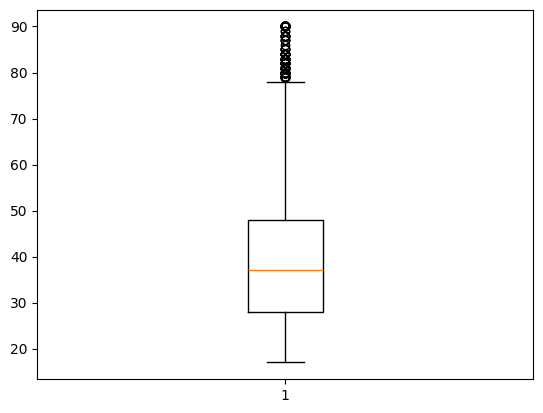

In [11]:
#checking for outliers using box plot
plt.boxplot(data['age'])
plt.show()

We can see that the age group 75-90 are acting as outliers in our dataset. So to get accurate predictions we can remove these outliers.

In [12]:
data=data[(data['age']<=75) & (data['age']>=17)]

In [13]:
data.shape

(48469, 15)

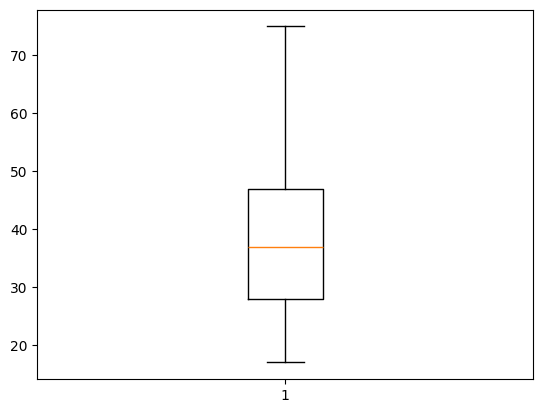

In [14]:
plt.boxplot(data['age'])
plt.show()

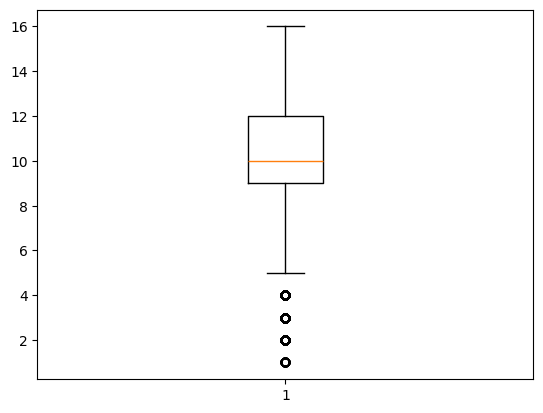

In [15]:
plt.boxplot(data['educational-num'])
plt.show()

In [16]:
data.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
Others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428
Without-pay,21
Never-worked,10


We do not need those values which have workclass as without pay and never worked, as they do not affect our prediction. Hence we remove them.

In [17]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']

In [18]:
data.workclass.value_counts()

,count
workclass,
Private,33756
Self-emp-not-inc,3796
Local-gov,3110
Others,2700
State-gov,1979
Self-emp-inc,1669
Federal-gov,1428


In [19]:
data.shape

(48438, 15)

In [20]:
data['education'].value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


Here Preschool, 1-4, 5-6th do not affect our data for employee salary prediction. Hence we can remove those.

In [21]:
data=data[data['education']!='1st-4th']
data=data[data['education']!='5th-6th']
data=data[data['education']!='Preschool']

In [22]:
data['education'].value_counts()

,count
education,
HS-grad,15655
Some-college,10824
Bachelors,7983
Masters,2634
Assoc-voc,2053
11th,1801
Assoc-acdm,1592
10th,1373
7th-8th,899


In [23]:
data.shape

(47619, 15)

In [24]:
print(data['native-country'].value_counts())

native-country
United-States                 43234
?                               824
Mexico                          601
Philippines                     276
Germany                         206
Canada                          177
Puerto-Rico                     170
India                           150
Cuba                            123
England                         122
China                           116
South                           111
El-Salvador                     105
Jamaica                         104
Japan                            91
Italy                            88
Dominican-Republic               85
Poland                           84
Columbia                         81
Vietnam                          80
Haiti                            67
Guatemala                        65
Taiwan                           65
Iran                             59
Portugal                         55
Greece                           47
Peru                             46
Nicaragua    

In [25]:
data['native-country'].replace({'?':'NotDefined'},inplace=True)
print('native-country')
print(data['native-country'].value_counts())

native-country
native-country
United-States                 43234
NotDefined                      824
Mexico                          601
Philippines                     276
Germany                         206
Canada                          177
Puerto-Rico                     170
India                           150
Cuba                            123
England                         122
China                           116
South                           111
El-Salvador                     105
Jamaica                         104
Japan                            91
Italy                            88
Dominican-Republic               85
Poland                           84
Columbia                         81
Vietnam                          80
Haiti                            67
Guatemala                        65
Taiwan                           65
Iran                             59
Portugal                         55
Greece                           47
Peru                             4

/tmp/ipython-input-25-3558290516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['native-country'].replace({'?':'NotDefined'},inplace=True)


In [26]:
#removing redundant groups
data=data.drop(columns=['education'])

In [27]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,NotSpecified,Own-child,White,Female,0,0,30,United-States,<=50K


In [28]:
from sklearn.preprocessing import LabelEncoder
import joblib

encoders = {}
categorical_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")


In [29]:
data.head(7)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,7,3,4,0,0,0,30,39,<=50K
5,34,3,198693,6,4,8,1,4,1,0,0,30,39,<=50K
6,29,2,227026,9,4,7,4,2,1,0,0,40,39,<=50K


In [30]:
predictors=data.drop(columns=['income'])
prediction=data['income']
predictors

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,7,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [31]:
prediction

,income
0,<=50K
1,<=50K
2,>50K
3,>50K
4,<=50K
...,...
48837,<=50K
48838,>50K
48839,<=50K
48840,<=50K


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    predictors, prediction, test_size=0.2, random_state=39
)

categorical_columns = [
    'workclass', 'marital-status', 'occupation',
    'relationship', 'race', 'gender', 'native-country'
]

encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])
    encoders[col] = le

# Save all encoders in one file
joblib.dump(encoders, "all_label_encoders.pkl")

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Save the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(pipe, "best_model.pkl")  # Save pipeline with scaler + model
print(f"✅ Saved best model: {best_model_name}")


LogisticRegression Accuracy: 0.8254
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7228
        >50K       0.72      0.46      0.56      2296

    accuracy                           0.83      9524
   macro avg       0.78      0.70      0.72      9524
weighted avg       0.81      0.83      0.81      9524

RandomForest Accuracy: 0.8601
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7228
        >50K       0.76      0.62      0.68      2296

    accuracy                           0.86      9524
   macro avg       0.82      0.78      0.80      9524
weighted avg       0.85      0.86      0.85      9524

KNN Accuracy: 0.8327
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7228
        >50K       0.67      0.60      0.63      2296

    accuracy                           0.83      9524
   macro avg       0.77      0.75      0.

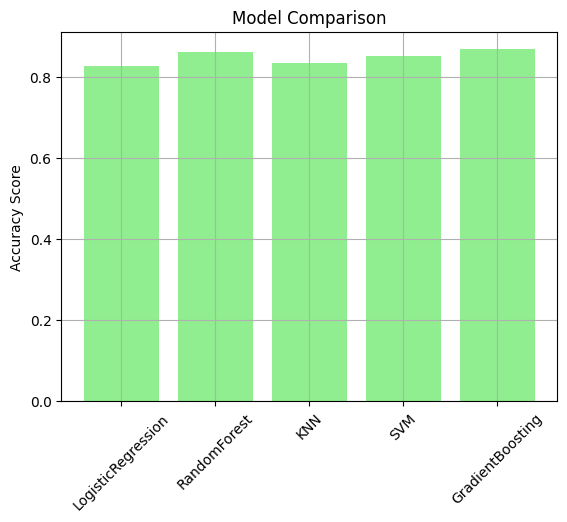

In [33]:
plt.bar(results.keys(), results.values(), color='lightgreen')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [40]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

saved_data = joblib.load("best_model.pkl")
model = saved_data['model'] if isinstance(saved_data, dict) else saved_data

st.set_page_config(
    page_title="Employee Salary Classification",
    page_icon="💼",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.markdown("""
    <style>
        body { background-color: #f4f6fc; }
        .main { background-color: #f4f6fc; }
        h1, h2, h3 { color: #002b55; }
        .stButton>button {
            background-color: #005f9e;
            color: white;
            font-weight: bold;
            border-radius: 8px;
            padding: 0.5em 1em;
        }
        .stButton>button:hover { background-color: #003f6f; }
        .stDownloadButton>button {
            background-color: #005f9e;
            color: white;
        }
    </style>
""", unsafe_allow_html=True)

def get_encoder(classes):
    le = LabelEncoder()
    le.classes_ = classes
    return le

# All label encoders
workclass_enc = get_encoder(['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'])
marital_enc = get_encoder(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'])
occupation_enc = get_encoder([
    'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
    'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
    'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv',
    'Sales', 'Tech-support', 'Transport-moving'
])
relationship_enc = get_encoder(['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'])
race_enc = get_encoder(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'])
gender_enc = get_encoder(['Female', 'Male'])
country_enc = get_encoder([
    'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador',
    'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras',
    'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
    'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal',
    'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States',
    'Vietnam', 'Yugoslavia'
])

# App title
st.title("💼 Employee Salary Classification")
st.markdown("Use the sidebar to input employee details and predict whether their salary is `>50K` or `≤50K`.")

# Sidebar input
st.sidebar.title("📝 Input Details")
age = st.sidebar.slider("📅 Age", 18, 70, 30)
education_num = st.sidebar.slider("🎓 Education Num", 1, 16, 10)
workclass = st.sidebar.selectbox("🏢 Workclass", workclass_enc.classes_)
marital = st.sidebar.selectbox("💍 Marital Status", marital_enc.classes_)
occupation = st.sidebar.selectbox("💼 Occupation", occupation_enc.classes_)
relationship = st.sidebar.selectbox("👨‍👩‍👧 Relationship", relationship_enc.classes_)
race = st.sidebar.selectbox("🎨 Race", race_enc.classes_)
gender = st.sidebar.selectbox("🚻 Gender", gender_enc.classes_)
hours_per_week = st.sidebar.slider("⏰ Hours per Week", 1, 80, 40)
country = st.sidebar.selectbox("🌍 Native Country", country_enc.classes_)
experience = st.sidebar.slider("🔧 Years of Experience", 0, 50, 5)

# Construct DataFrame
input_df = pd.DataFrame([{
    'age': age,
    'workclass': workclass,
    'marital-status': marital,
    'occupation': occupation,
    'relationship': relationship,
    'race': race,
    'gender': gender,
    'hours-per-week': hours_per_week,
    'native-country': country,
    'education-num': education_num,
    'experience': experience
}])

# Layout
col1, col2 = st.columns(2)

with col1:
    st.subheader("🔎 Single Prediction")
    st.write("#### Input Summary")
    st.dataframe(input_df)

    if st.button("✨ Predict Salary Class"):
        try:
            # Encode input
            input_df['workclass'] = workclass_enc.transform(input_df['workclass'])
            input_df['marital-status'] = marital_enc.transform(input_df['marital-status'])
            input_df['occupation'] = occupation_enc.transform(input_df['occupation'])
            input_df['relationship'] = relationship_enc.transform(input_df['relationship'])
            input_df['race'] = race_enc.transform(input_df['race'])
            input_df['gender'] = gender_enc.transform(input_df['gender'])
            input_df['native-country'] = country_enc.transform(input_df['native-country'])

            # Predict
            prediction = model.predict(input_df)[0]
            result = ">50K" if prediction == 1 else "≤50K"
            st.success(f"**✅ Predicted Class: {result}**")
        except Exception as e:
            st.error(f"Error during prediction: {e}")

with col2:
    st.subheader("📂 Batch Prediction (CSV Upload)")
    uploaded_file = st.file_uploader("Upload CSV with employee data", type="csv")

    if uploaded_file is not None:
        try:
            batch_data = pd.read_csv(uploaded_file)
            st.write("Preview of Uploaded Data")
            st.dataframe(batch_data.head())

            # Encode categorical columns
            batch_data['workclass'] = workclass_enc.transform(batch_data['workclass'])
            batch_data['marital-status'] = marital_enc.transform(batch_data['marital-status'])
            batch_data['occupation'] = occupation_enc.transform(batch_data['occupation'])
            batch_data['relationship'] = relationship_enc.transform(batch_data['relationship'])
            batch_data['race'] = race_enc.transform(batch_data['race'])
            batch_data['gender'] = gender_enc.transform(batch_data['gender'])
            batch_data['native-country'] = country_enc.transform(batch_data['native-country'])

            # Predict
            batch_preds = model.predict(batch_data)
            batch_data['PredictedClass'] = [">50K" if x == 1 else "≤50K" for x in batch_preds]

            st.write("✅ Prediction Results")
            st.dataframe(batch_data.head())

            # Download
            csv_download = batch_data.to_csv(index=False).encode('utf-8')
            st.download_button(
                label="⬇️ Download Results as CSV",
                data=csv_download,
                file_name="batch_predictions.csv",
                mime="text/csv"
            )

        except Exception as e:
            st.error(f"Error while predicting: {e}")


Overwriting app.py


In [35]:
!pip install streamlit pyngrok --quiet


In [36]:
from google.colab import files
files.upload()


Saving best_model.pkl to best_model (1).pkl


{'best_model (1).pkl': b'\x80\x04\x95w\x01\x00\x00\x00\x00\x00\x00\x8c\x10sklearn.pipeline\x94\x8c\x08Pipeline\x94\x93\x94)\x81\x94}\x94(\x8c\x05steps\x94]\x94(\x8c\x06scaler\x94\x8c\x1bsklearn.preprocessing._data\x94\x8c\x0eStandardScaler\x94\x93\x94)\x81\x94}\x94(\x8c\twith_mean\x94\x88\x8c\x08with_std\x94\x88\x8c\x04copy\x94\x88\x8c\x11feature_names_in_\x94\x8c\x13joblib.numpy_pickle\x94\x8c\x11NumpyArrayWrapper\x94\x93\x94)\x81\x94}\x94(\x8c\x08subclass\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94\x8c\x05shape\x94K\r\x85\x94\x8c\x05order\x94\x8c\x01C\x94\x8c\x05dtype\x94h\x17\x8c\x05dtype\x94\x93\x94\x8c\x02O8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?t\x94b\x8c\nallow_mmap\x94\x89\x8c\x1bnumpy_array_alignment_bytes\x94K\x10ub\x80\x05\x954\x01\x00\x00\x00\x00\x00\x00\x8c\x16numpy._core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\r\x85\x94h\x03\x8c\x05

In [37]:
from pyngrok import ngrok
ngrok.set_auth_token("30ajdJULbrvItnUULTvqGiCSOfO_38HzS3bAYQW6MZk3M2Akt")


In [38]:
from pyngrok import ngrok
!pkill streamlit

!streamlit run app.py &>/content/logs.txt &

public_url = ngrok.connect(8501, "http")
print(f"🚀 Your Streamlit app is live here: {public_url}")


🚀 Your Streamlit app is live here: NgrokTunnel: "https://259971599e81.ngrok-free.app" -> "http://localhost:8501"
